In [2]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img
import pandas as pd
import numpy as np

In [3]:
base_model = ResNet50(include_top=False, weights='imagenet')

94765736/94765736 [==============================] - 4s 0us/step


In [3]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                        

In [124]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Flatten,GlobalAveragePooling2D,BatchNormalization
from keras.optimizers import SGD
from glob import glob
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [51]:
for layer in base_model.layers:
  layer.trainable = False

In [125]:
folders=glob('/content/drive/MyDrive/train/*')

In [126]:
x = base_model.output
x = GlobalAveragePooling2D()(x)

In [134]:
x = BatchNormalization()(x)
x = Dense(256, activation='relu')(x)

In [135]:
predictions = Dense(2, activation='softmax')(x)

In [136]:
baseline_model = Model(inputs=base_model.input, outputs=predictions)

In [137]:
baseline_model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics = ['accuracy'])

In [138]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [139]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [146]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/train',
                                                 target_size = (224, 224),
                                                 color_mode="rgb",
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 103 images belonging to 2 classes.


In [147]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/test',
                                            target_size = (224, 224),
                                            color_mode="rgb",
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 20 images belonging to 2 classes.


In [149]:
history = baseline_model.fit(training_set,
                         steps_per_epoch=len(training_set),        
                         epochs = 5,
                         validation_data = test_set,
                         validation_split=0.2)

Epoch 1/5
4/4 [==============================] - 32s 10s/step - loss: 0.5460 - accuracy: 0.7670 - val_loss: 0.5075 - val_accuracy: 0.7000
Epoch 2/5
4/4 [==============================] - 28s 7s/step - loss: 0.3658 - accuracy: 0.8252 - val_loss: 0.4833 - val_accuracy: 0.8000
Epoch 3/5
4/4 [==============================] - 31s 8s/step - loss: 0.2556 - accuracy: 0.9126 - val_loss: 0.4295 - val_accuracy: 0.8500
Epoch 4/5
4/4 [==============================] - 32s 8s/step - loss: 0.1896 - accuracy: 0.9126 - val_loss: 0.3963 - val_accuracy: 0.9000
Epoch 5/5
4/4 [==============================] - 27s 7s/step - loss: 0.2079 - accuracy: 0.8932 - val_loss: 0.3822 - val_accuracy: 0.9500


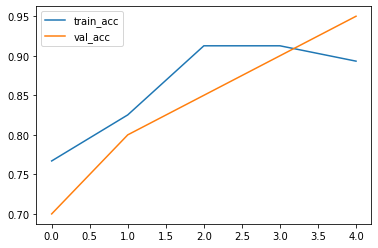

<Figure size 432x288 with 0 Axes>

In [150]:
plt.plot(history.history['accuracy'],label='train_acc')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.legend()
plt.show()

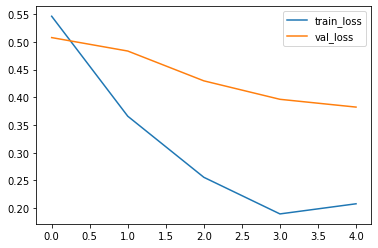

In [151]:
plt.plot(history.history['loss'],label='train_loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [152]:
filenames = test_set.filenames
nb_samples = len(filenames)

In [153]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [154]:
import numpy as np
validation_data=test_set
Y_pred = baseline_model.predict_generator(test_set,nb_samples)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_data.classes, y_pred))

<ipython-input-154-85dc51f57973>:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = baseline_model.predict_generator(test_set,nb_samples)


Confusion Matrix
[[5 5]
 [4 6]]


In [155]:
accuracy_score(validation_data.classes,y_pred)

0.55

In [156]:
print('Classification Report')
target_names = ['Healthy', 'Stressed']
print(classification_report(test_set.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

     Healthy       0.56      0.50      0.53        10
    Stressed       0.55      0.60      0.57        10

    accuracy                           0.55        20
   macro avg       0.55      0.55      0.55        20
weighted avg       0.55      0.55      0.55        20

